In [1]:
import sys
sys.path.append("../../..")  # Adjust based on the relative path to your project root

In [2]:
from Filters.audio import Audio

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy import signal
import numpy as np
import time

In [4]:
base_path_1 = '/Users/KevMcK/Dropbox/2 Work/1 Optics Lab/2 FOSSN/Data'
base_path_2 = '/Sounds'
filename = 'diesel_idle_1_4'


filepath = f'{base_path_1}/{base_path_2}/{filename}.wav'
audio = Audio(filepath=filepath, num_channels=1)
chunk_size_seconds = 1

In [5]:
print(audio)

---------Audio Object---------
path: /Users/KevMcK/Dropbox/2 Work/1 Optics Lab/2 FOSSN/Data/Sounds/diesel_idle_1_4.wav
name: diesel_idle_1_4
sample_rate: 48000 Hz
num_channels: 1
sample_length: 239.75 s
num_samples: 11507901
data type: float32
data shape: (11507901,)
data: [ 0.12374878  0.12374878  0.12997437 ... -0.17358398 -0.19766235
 -0.21948242]


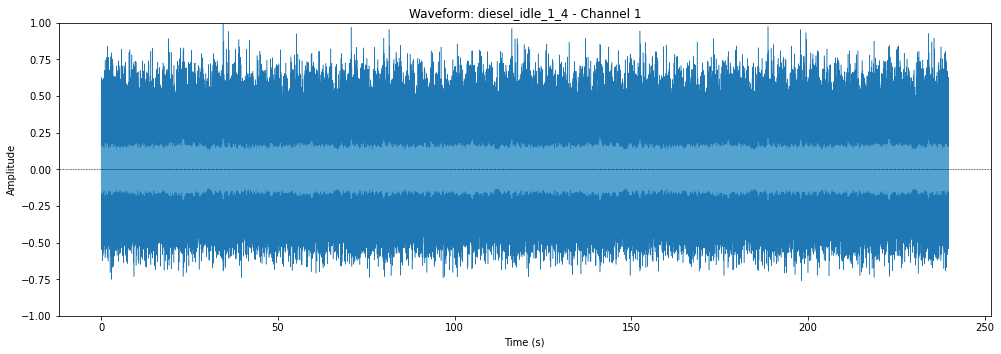

In [6]:
audio.waveform_rms_overlay(display=True)

In [7]:
bandwidth = (30, 20000)
nperseg = 2 ** 10 # 10: 1024 /11: 2048 / 12: 4096 / 13: 8192 / 14: 16384 / 15: 32768
f, t, Sxx = signal.spectrogram(audio.data, fs=audio.sample_rate, nperseg=nperseg)

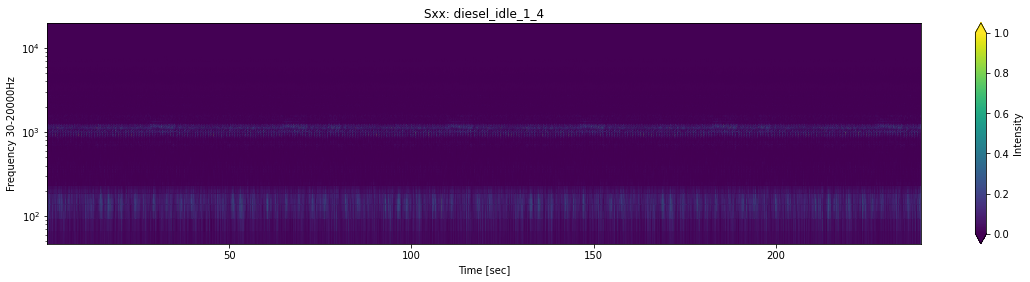

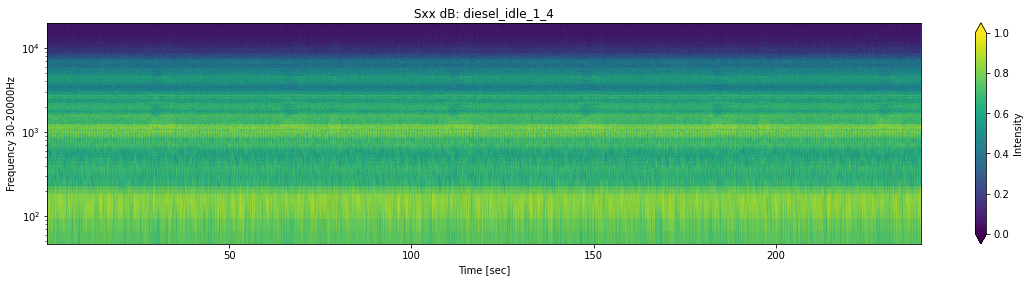

In [8]:
Sxx_min = Sxx.min()
Sxx_max = Sxx.max()

if Sxx_max - Sxx_min != 0:
    Sxx_norm = (Sxx - Sxx_min) / (Sxx_max - Sxx_min)
else:
    Sxx_norm = np.zeros(Sxx.shape)  # Handle the case where Sxx_max == Sxx_min

# Find indices of the frequency range
freq_indices = np.where((f >= bandwidth[0]) & (f <= bandwidth[1]))[0]
f_subset = f[freq_indices]
Sxx_norm_splice = Sxx_norm[freq_indices, :]

plt.figure(figsize=(16,4))
plt.pcolormesh(t, f_subset, Sxx_norm_splice, shading='gouraud', vmin=0, vmax=1)
plt.ylabel(f'Frequency {bandwidth[0]}-{bandwidth[1]}Hz')
plt.xlabel('Time [sec]')
plt.title(f'Sxx: {audio.name}')
plt.colorbar(label='Intensity', extend='both')
plt.yscale('log')
plt.tight_layout(pad=1)
plt.show()

epsilon = 1e-10 # Define a small constant to prevent log of zero
spec = 10 * np.log10(Sxx + epsilon)

# Normalize spec between 0 and 1
spec_min = spec.min()
spec_max = spec.max()

if spec_max - spec_min != 0:
    spec_norm = (spec - spec_min) / (spec_max - spec_min)
else:
    spec_norm = np.zeros(spec.shape)  # Handle the case where spec_max == spec_min

# Find indices of the frequency range
freq_indices = np.where((f >= bandwidth[0]) & (f <= bandwidth[1]))[0]
f_subset = f[freq_indices]
spec_norm_splice = spec_norm[freq_indices, :]

# Plot the normalized spectrogram for the specified frequency range
plt.figure(figsize=(16,4))
plt.pcolormesh(t, f_subset, spec_norm_splice, shading='gouraud', vmin=0, vmax=1)
plt.ylabel(f'Frequency {bandwidth[0]}-{bandwidth[1]}Hz')
plt.xlabel('Time [sec]')
plt.title(f'Sxx dB: {audio.name}')
plt.colorbar(label='Intensity', extend='both')
plt.yscale('log')
plt.tight_layout(pad=1)
plt.show()

In [9]:
print(f'Freq: {f.shape}')
print(f'Time: {t.shape}')
print(f'PSD: {Sxx.shape}')

Freq: (513,)
Time: (12843,)
PSD: (513, 12843)


Text(0.5, 1.0, 'Sxx dB: diesel_idle_1_4')

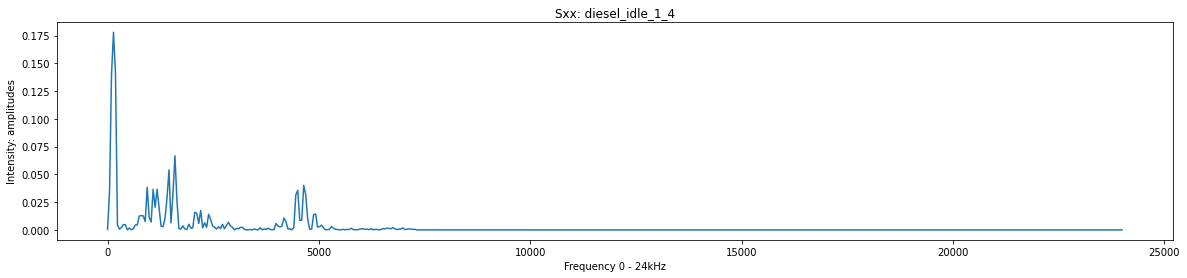

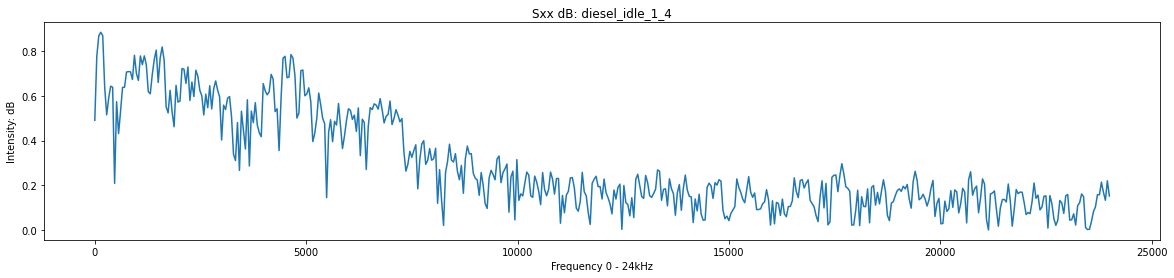

In [10]:
plt.figure(figsize=(20,4))
plt.plot(f, Sxx_norm.T[0])
plt.xlabel(f'Frequency 0 - 24kHz')
plt.ylabel('Intensity: amplitudes')
plt.title(f'Sxx: {audio.name}')

plt.figure(figsize=(20,4))
plt.plot(f, spec_norm.T[0])
plt.xlabel(f'Frequency 0 - 24kHz')
plt.ylabel('Intensity: dB')
plt.title(f'Sxx dB: {audio.name}')

Text(0, 0.5, 'Frequency (Hz)')

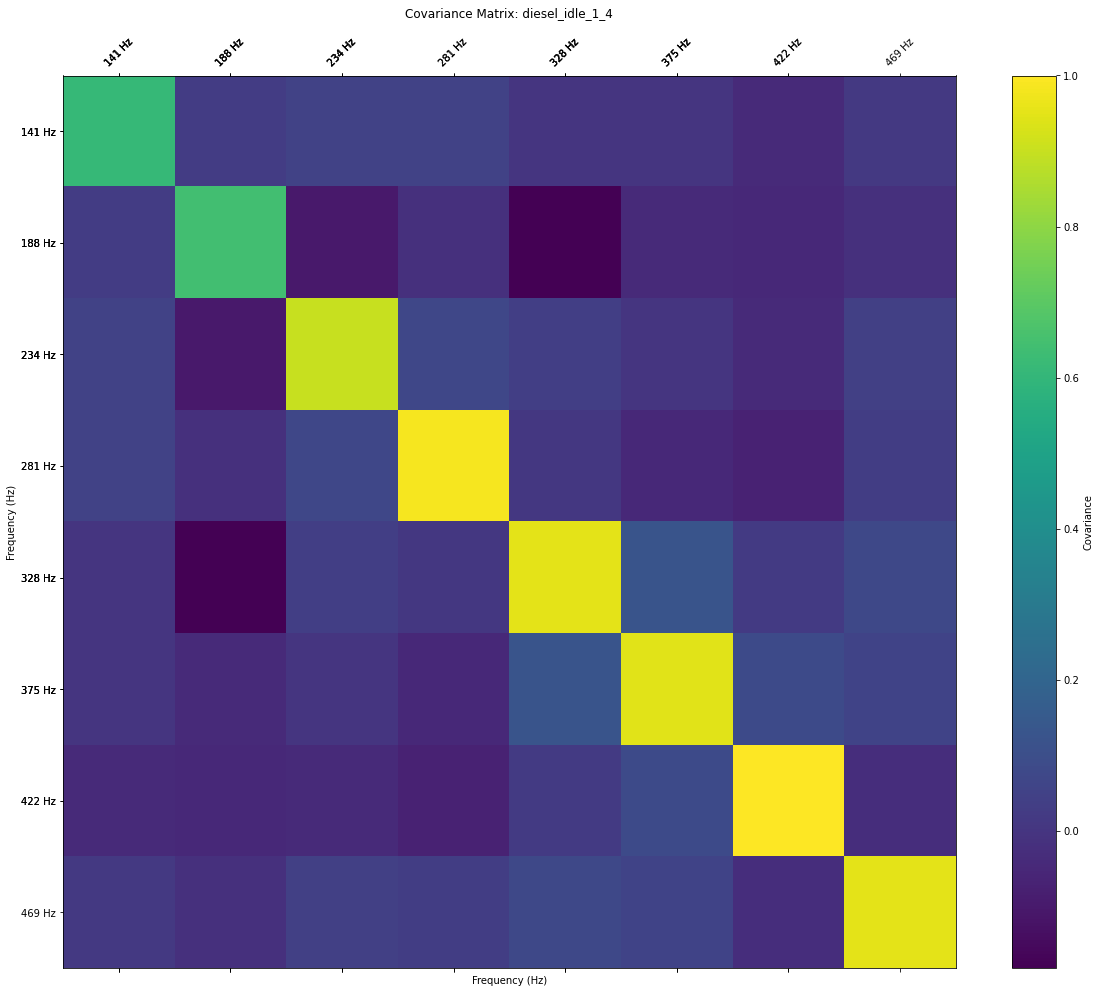

In [11]:
bandwidth = (100, 500)
freq_indices = np.where((f >= bandwidth[0]) & (f <= bandwidth[1]))[0]
f_subset = f[freq_indices]
spec_norm_splice = spec_norm[freq_indices, :]

cov_matrix = np.cov(spec_norm_splice)
cov_matrix_max = cov_matrix.max()
cov_matrix = cov_matrix / cov_matrix_max

plt.figure(figsize=(20, 16))
plt.matshow(cov_matrix, fignum=1, cmap='viridis')
plt.colorbar(label='Covariance')

num_ticks = 20  # Adjust as needed
tick_indices = np.linspace(0, len(f_subset) - 1, num_ticks).astype(int)
tick_labels = [f"{f_subset[i]:.0f} Hz" for i in tick_indices]

plt.xticks(tick_indices, tick_labels, rotation=45)
plt.yticks(tick_indices, tick_labels)
plt.title(f'Covariance Matrix: {audio.name}', pad=20)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Frequency (Hz)")

Text(0, 0.5, 'Frequency (Hz)')

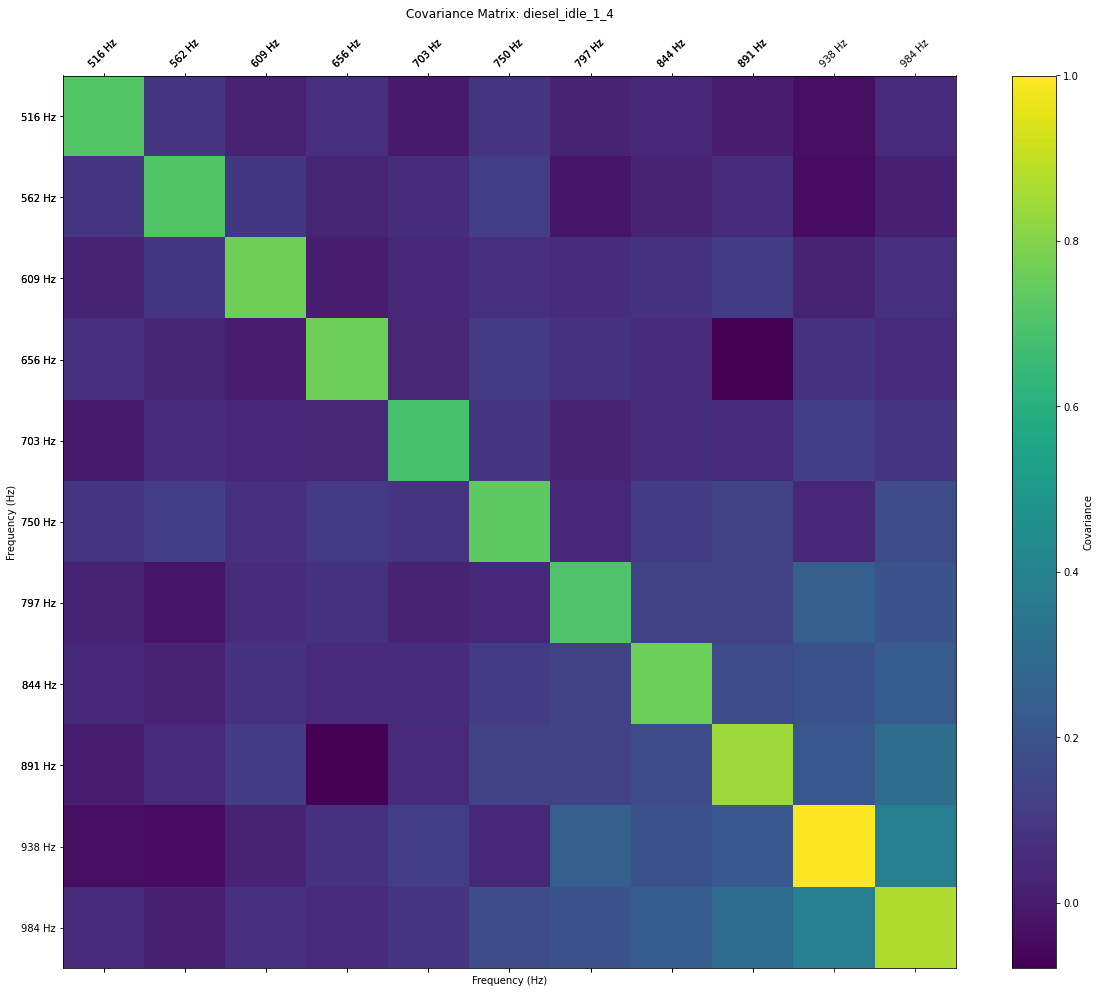

In [12]:
bandwidth = (500, 1000)
freq_indices = np.where((f >= bandwidth[0]) & (f <= bandwidth[1]))[0]
f_subset = f[freq_indices]
spec_norm_splice = spec_norm[freq_indices, :]

cov_matrix = np.cov(spec_norm_splice)
cov_matrix_max = cov_matrix.max()
cov_matrix = cov_matrix / cov_matrix_max

plt.figure(figsize=(20, 16))
plt.matshow(cov_matrix, fignum=1, cmap='viridis')
plt.colorbar(label='Covariance')

num_ticks = 20  # Adjust as needed
tick_indices = np.linspace(0, len(f_subset) - 1, num_ticks).astype(int)
tick_labels = [f"{f_subset[i]:.0f} Hz" for i in tick_indices]

plt.xticks(tick_indices, tick_labels, rotation=45)
plt.yticks(tick_indices, tick_labels)
plt.title(f'Covariance Matrix: {audio.name}', pad=20)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Frequency (Hz)")

Text(0, 0.5, 'Frequency (Hz)')

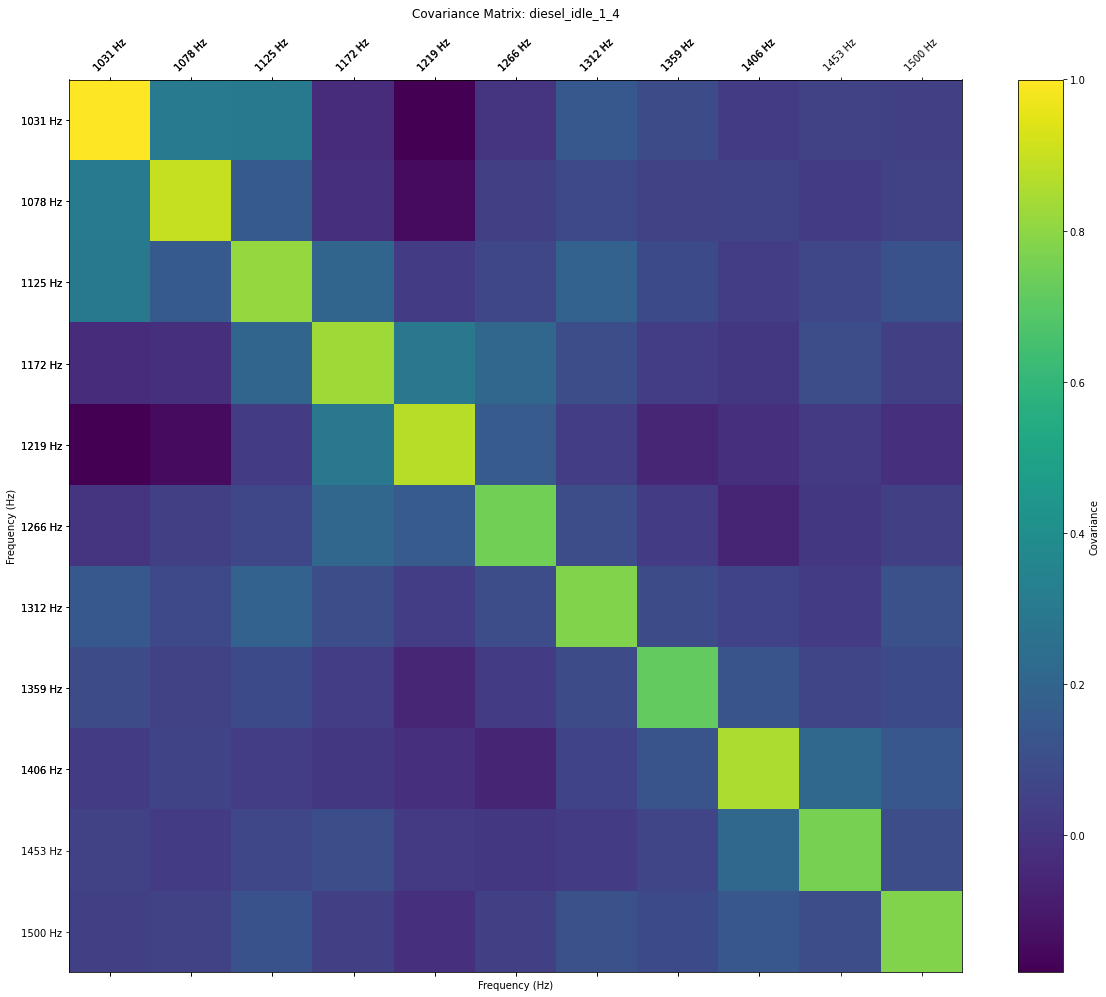

In [13]:
bandwidth = (1000, 1500)
freq_indices = np.where((f >= bandwidth[0]) & (f <= bandwidth[1]))[0]
f_subset = f[freq_indices]
spec_norm_splice = spec_norm[freq_indices, :]

cov_matrix = np.cov(spec_norm_splice)
cov_matrix_max = cov_matrix.max()
cov_matrix = cov_matrix / cov_matrix_max

plt.figure(figsize=(20, 16))
plt.matshow(cov_matrix, fignum=1, cmap='viridis')
plt.colorbar(label='Covariance')

num_ticks = 20  # Adjust as needed
tick_indices = np.linspace(0, len(f_subset) - 1, num_ticks).astype(int)
tick_labels = [f"{f_subset[i]:.0f} Hz" for i in tick_indices]

plt.xticks(tick_indices, tick_labels, rotation=45)
plt.yticks(tick_indices, tick_labels)
plt.title(f'Covariance Matrix: {audio.name}', pad=20)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Frequency (Hz)")

Text(0, 0.5, 'Frequency (Hz)')

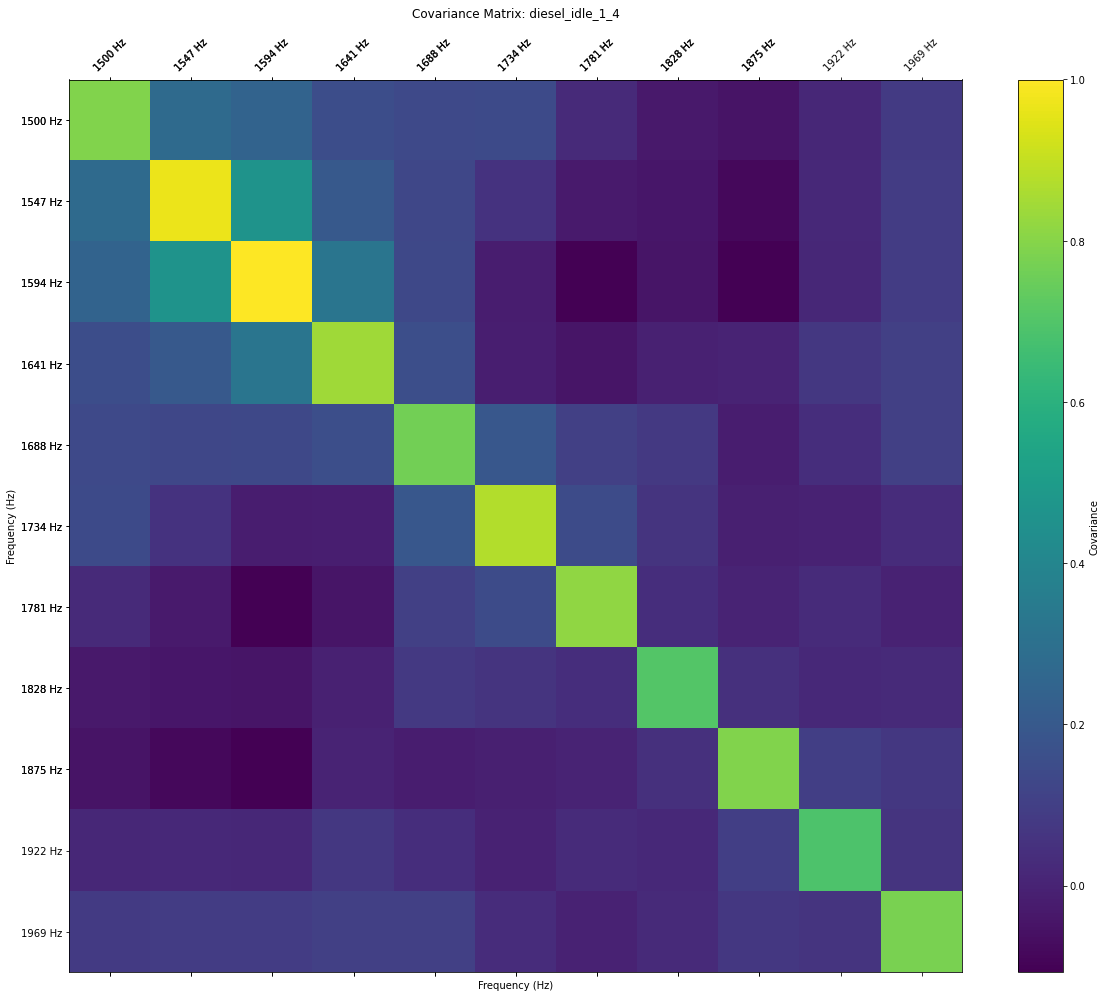

In [14]:
bandwidth = (1500, 2000)
freq_indices = np.where((f >= bandwidth[0]) & (f <= bandwidth[1]))[0]
f_subset = f[freq_indices]
spec_norm_splice = spec_norm[freq_indices, :]

cov_matrix = np.cov(spec_norm_splice)
cov_matrix_max = cov_matrix.max()
cov_matrix = cov_matrix / cov_matrix_max

plt.figure(figsize=(20, 16))
plt.matshow(cov_matrix, fignum=1, cmap='viridis')
plt.colorbar(label='Covariance')

num_ticks = 20  # Adjust as needed
tick_indices = np.linspace(0, len(f_subset) - 1, num_ticks).astype(int)
tick_labels = [f"{f_subset[i]:.0f} Hz" for i in tick_indices]

plt.xticks(tick_indices, tick_labels, rotation=45)
plt.yticks(tick_indices, tick_labels)
plt.title(f'Covariance Matrix: {audio.name}', pad=20)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Frequency (Hz)")

In [15]:
nperseg = 2 ** 10 # 10: 1024 /11: 2048 / 12: 4096 / 13: 8192 / 14: 16384 / 15: 32768
f, t, Sxx_covar = signal.spectrogram(audio.data, fs=audio.sample_rate, nperseg=nperseg)
Sxx_covar_min = Sxx.min()
Sxx_covar_max = Sxx.max()

if Sxx_covar_max - Sxx_covar_min != 0:
    Sxx_covar_norm = (Sxx_covar - Sxx_covar_min) / (Sxx_covar_max - Sxx_covar_min)
else:
    Sxx_covar_norm = np.zeros(Sxx_covar.shape)  # Handle the case where Sxx_max == Sxx_min

print(Sxx_covar_norm.shape)

bandwidth = (0, 3000)
freq_indices = np.where((f >= bandwidth[0]) & (f <= bandwidth[1]))[0]
f_covar = f[freq_indices]
spec_covar = Sxx_covar_norm[freq_indices, :]
print(spec_covar.shape)

cov_matrix = np.cov(spec_covar)
cov_matrix_max = cov_matrix.max()
# cov_matrix = cov_matrix / cov_matrix_max
print(cov_matrix.shape)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

(513, 12843)
(65, 12843)
(65, 65)


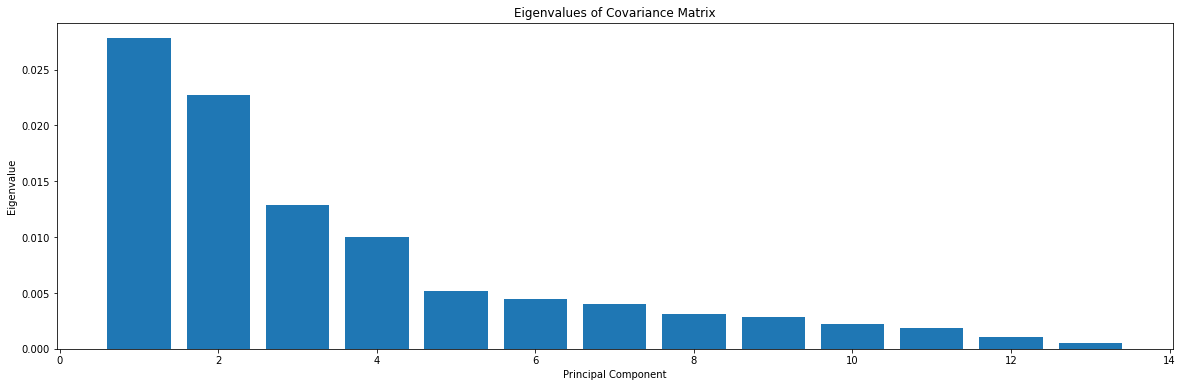

In [17]:
top_number = int(np.round((len(eigenvalues) * 0.2), 0))
plt.figure(figsize=(20, 6))
plt.bar(range(1, top_number + 1), eigenvalues[:top_number])
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues of Covariance Matrix")
plt.show()

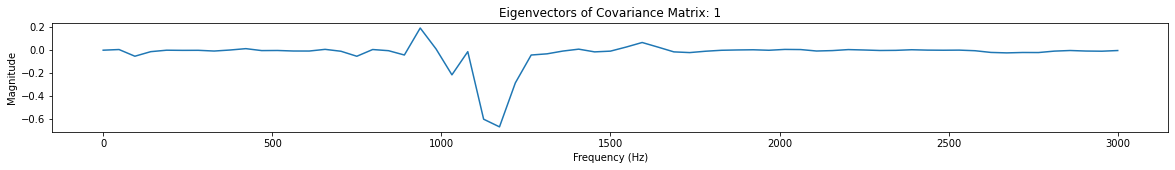

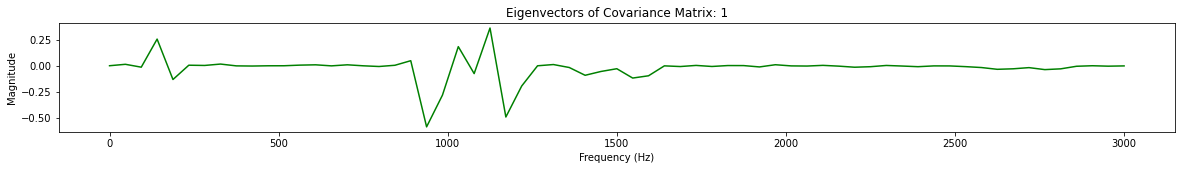

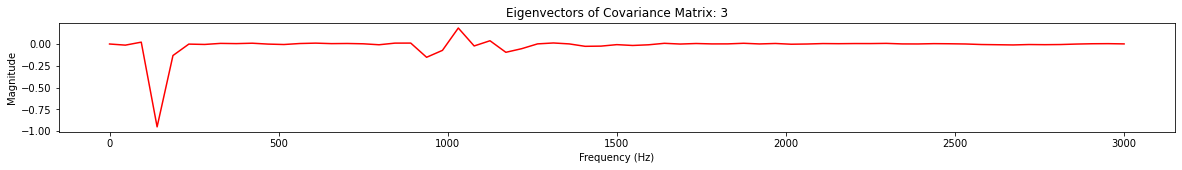

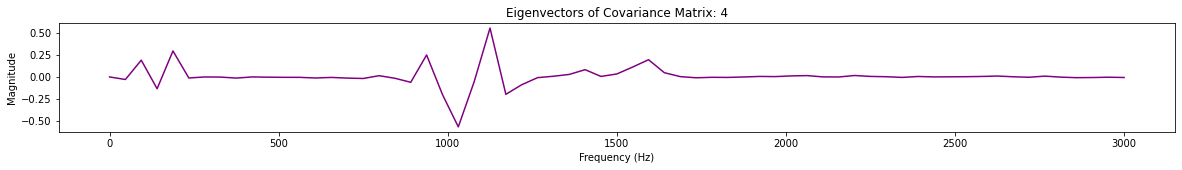

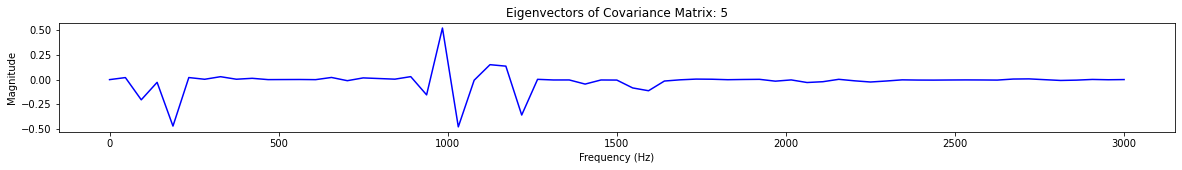

In [18]:
width, height = 20, 2
plt.figure(figsize=(width, height))
plt.plot(f_covar, eigenvectors[:, 1])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Eigenvectors of Covariance Matrix: 1")
plt.show()

plt.figure(figsize=(width, height))
plt.plot(f_covar, eigenvectors[:, 2], color='g')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Eigenvectors of Covariance Matrix: 1")
plt.show()

plt.figure(figsize=(width, height))
plt.plot(f_covar, eigenvectors[:, 3], color='r')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Eigenvectors of Covariance Matrix: 3")
plt.show()

plt.figure(figsize=(width, height))
plt.plot(f_covar, eigenvectors[:, 4], color='purple')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Eigenvectors of Covariance Matrix: 4")
plt.show()

plt.figure(figsize=(width, height))
plt.plot(f_covar, eigenvectors[:, 5], color='b')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Eigenvectors of Covariance Matrix: 5")
plt.show()